In [1]:
library(ggplot2)
library(GGally)
library(lme4)
library(lattice)

Loading required package: Matrix


In [2]:
path <- '/nfs/turbo/intmed-bnallamo-turbo/wsliu/Data/NRD/'

In [2]:
path <- '/nfs/turbo/umms-awaljee/wsliu/Data/NRD/'

In [3]:
cohort = 'ami'
tst_fold = 0

In [10]:
train.df <- read.csv(file = paste0(path, 'cohorts30/', cohort, '/train', tst_fold, '.csv'))
tst.df <- read.csv(file = paste0(path, 'cohorts30/', cohort, '/tst', tst_fold, '.csv'))

In [9]:
comorbs <- c('CM_AIDS', 'CM_ALCOHOL', 'CM_ANEMDEF', 'CM_ARTH', 'CM_BLDLOSS', 'CM_CHF', 'CM_CHRNLUNG', 'CM_COAG', 'CM_DEPRESS', 'CM_DM', 'CM_DMCX', 'CM_DRUG', 'CM_HTN_C', 'CM_HYPOTHY', 'CM_LIVER', 'CM_LYMPH', 'CM_LYTES', 'CM_METS', 'CM_NEURO', 'CM_OBESE', 'CM_PARA', 'CM_PERIVASC', 'CM_PSYCH', 'CM_PULMCIRC', 'CM_RENLFAIL', 'CM_TUMOR', 'CM_ULCER', 'CM_VALVE', 'CM_WGHTLOSS')

In [11]:
train.df$HOSP_NRD <- as.factor(train.df$HOSP_NRD)
tst.df$HOSP_NRD <- as.factor(tst.df$HOSP_NRD)

train.df$FEMALE <- as.factor(train.df$FEMALE)
tst.df$FEMALE <- as.factor(tst.df$FEMALE)
for(c in comorbs){
    train.df[ , c] <- as.factor(train.df[ , c])
    tst.df[ , c] <- as.factor(tst.df[ , c])
}

age.mean <- mean(train.df$AGE)
age.std <- sd(train.df$AGE)

train.df$AGE <- (train.df$AGE - age.mean)/age.std
tst.df$AGE <- (tst.df$AGE - age.mean)/age.std

train.df$readm30 <- as.numeric(train.df$readm30) - 1
tst.df$readm30 <- as.numeric(tst.df$readm30) - 1

In [9]:
head(train.df)

AGE,AWEEKEND,DIED,DISCWT,DISPUNIFORM,DMONTH,DQTR,DRG,DRGVER,DRG_NoPOA,⋯,CM_OBESE,CM_PARA,CM_PERIVASC,CM_PSYCH,CM_PULMCIRC,CM_RENLFAIL,CM_TUMOR,CM_ULCER,CM_VALVE,CM_WGHTLOSS
63,0,0,1.505411,1,11,4,247,32,247,⋯,0,0,0,0,0,0,0,0,0,0
84,0,0,2.359884,5,2,1,280,31,280,⋯,0,0,0,0,0,0,0,0,0,0
57,1,0,1.945870,6,5,2,280,31,280,⋯,1,0,0,0,0,1,0,0,0,0
55,0,0,3.319084,5,7,3,280,31,280,⋯,0,0,0,0,0,0,0,0,0,0
74,0,0,2.312238,1,2,1,247,31,247,⋯,0,0,0,0,0,0,0,0,0,0
61,1,0,1.962384,1,3,1,247,31,247,⋯,0,0,0,0,0,0,0,0,0,0


In [13]:
dim(train.df)
dim(tst.df)

[1] 164370    183

[1] 18599   183

In [14]:
result <- glmer(readm30 ~ CM_AIDS + CM_ALCOHOL + CM_ANEMDEF + CM_ARTH + CM_BLDLOSS + CM_CHF + CM_CHRNLUNG + CM_COAG + 
                CM_DEPRESS + CM_DM + CM_DMCX + CM_DRUG + CM_HTN_C + CM_HYPOTHY + CM_LIVER + CM_LYMPH + CM_LYTES + CM_METS + 
                CM_NEURO + CM_OBESE + CM_PARA + CM_PERIVASC + CM_PSYCH + CM_PULMCIRC + CM_RENLFAIL + CM_TUMOR + CM_ULCER + 
                CM_VALVE + CM_WGHTLOSS + AGE + FEMALE + (1|HOSP_NRD), data = train.df, family = binomial, 
                control = glmerControl(optimizer = "nloptwrap", calc.derivs = F), nAGQ=7)

In [12]:
result <- glmer(readm30 ~ CM_AIDS + CM_ALCOHOL + CM_ANEMDEF + CM_ARTH + CM_BLDLOSS + CM_CHF + CM_CHRNLUNG + CM_COAG + 
                CM_DEPRESS + CM_DM + CM_DMCX + CM_DRUG + CM_HTN_C + CM_HYPOTHY + CM_LIVER + CM_LYMPH + CM_LYTES + CM_METS + 
                CM_NEURO + CM_OBESE + CM_PARA + CM_PERIVASC + CM_PSYCH + CM_PULMCIRC + CM_RENLFAIL + CM_TUMOR + CM_ULCER + 
                CM_VALVE + CM_WGHTLOSS + AGE + FEMALE + (1|HOSP_NRD), data = train.df, family = binomial, 
               control = glmerControl(optimizer = "nloptwrap", optCtrl=list(maxfun=2e5)))

In [8]:
summary(result) #tst_fold=0


Correlation matrix not shown by default, as p = 32 > 12.
Use print(obj, correlation=TRUE)  or
	 vcov(obj)	 if you need it



Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 7) [glmerMod]
 Family: binomial  ( logit )
Formula: readm30 ~ CM_AIDS + CM_ALCOHOL + CM_ANEMDEF + CM_ARTH + CM_BLDLOSS +  
    CM_CHF + CM_CHRNLUNG + CM_COAG + CM_DEPRESS + CM_DM + CM_DMCX +  
    CM_DRUG + CM_HTN_C + CM_HYPOTHY + CM_LIVER + CM_LYMPH + CM_LYTES +  
    CM_METS + CM_NEURO + CM_OBESE + CM_PARA + CM_PERIVASC + CM_PSYCH +  
    CM_PULMCIRC + CM_RENLFAIL + CM_TUMOR + CM_ULCER + CM_VALVE +  
    CM_WGHTLOSS + AGE + FEMALE + (1 | HOSP_NRD)
   Data: train.df
Control: glmerControl(optimizer = "nloptwrap", calc.derivs = F)

     AIC      BIC   logLik deviance df.resid 
115765.6 116095.9 -57849.8 115699.6   164247 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.4672 -0.3950 -0.3096 -0.2504  5.9572 

Random effects:
 Groups   Name        Variance Std.Dev.
 HOSP_NRD (Intercept) 0.0427   0.2066  
Number of obs: 164280, groups:  HOSP_NRD, 874

Fixed effects:
        

In [15]:
summary(result) #tst_fold=1


Correlation matrix not shown by default, as p = 32 > 12.
Use print(obj, correlation=TRUE)  or
	 vcov(obj)	 if you need it



Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 7) [glmerMod]
 Family: binomial  ( logit )
Formula: readm30 ~ CM_AIDS + CM_ALCOHOL + CM_ANEMDEF + CM_ARTH + CM_BLDLOSS +  
    CM_CHF + CM_CHRNLUNG + CM_COAG + CM_DEPRESS + CM_DM + CM_DMCX +  
    CM_DRUG + CM_HTN_C + CM_HYPOTHY + CM_LIVER + CM_LYMPH + CM_LYTES +  
    CM_METS + CM_NEURO + CM_OBESE + CM_PARA + CM_PERIVASC + CM_PSYCH +  
    CM_PULMCIRC + CM_RENLFAIL + CM_TUMOR + CM_ULCER + CM_VALVE +  
    CM_WGHTLOSS + AGE + FEMALE + (1 | HOSP_NRD)
   Data: train.df
Control: glmerControl(optimizer = "nloptwrap", calc.derivs = F)

     AIC      BIC   logLik deviance df.resid 
115760.3 116090.6 -57847.1 115694.3   164337 

Scaled residuals: 
   Min     1Q Median     3Q    Max 
-1.377 -0.395 -0.310 -0.251  5.956 

Random effects:
 Groups   Name        Variance Std.Dev.
 HOSP_NRD (Intercept) 0.04211  0.2052  
Number of obs: 164370, groups:  HOSP_NRD, 874

Fixed effects:
              Esti

In [ ]:
rf <- ranef(result, condVar = TRUE)
postVar = attr(rf$HOSP_NRD, 'postVar')

random_effects = rf$HOSP_NRD
dim(postVar) = dim(postVar)[3]
random_effects$postVar = postVar

In [47]:
write.csv(random_effects, paste0(path, 'cohorts30/ami/random_effects.csv'))

$HOSP_NRD


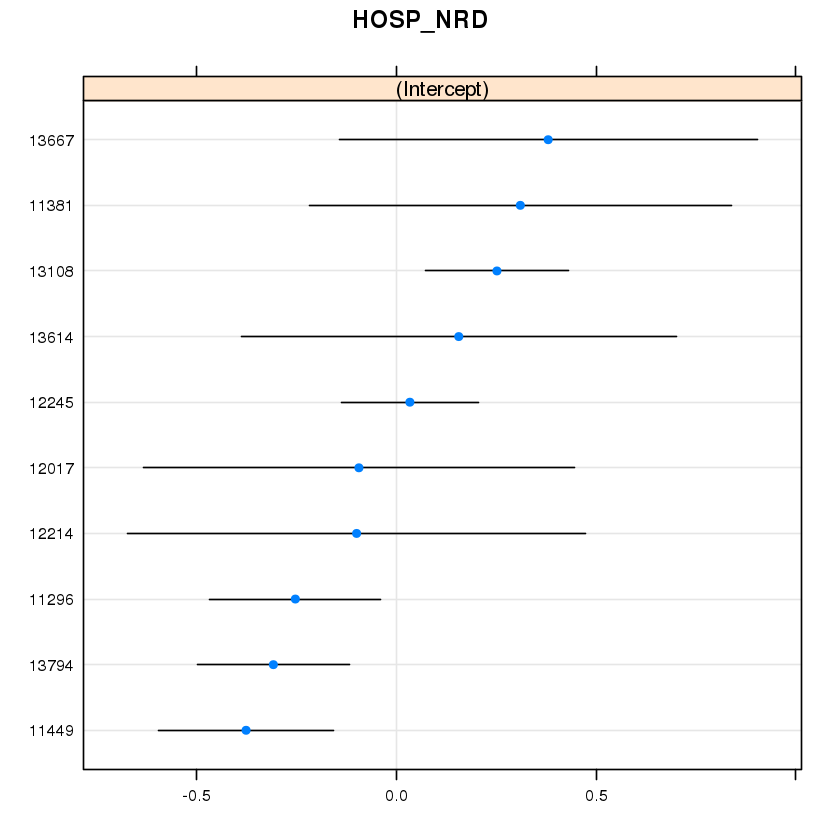

In [33]:
dotplot(rf)

In [50]:
write.csv(coef(result)$HOSP_NRD[ ,c('(Intercept)', 'AGE')], file = paste0(path, 'cohorts/', cohort, '/intercepts0.csv'))

In [10]:
pred_score <- predict(result, newdata = tst.df, type = 'response')

pred_test <- data.frame(y_pred = pred_score, y_true = tst.df$readm30)

write.csv(pred_test, file = paste0(path, 'cohorts30/ami/prediction_MELR0.csv'))

In [33]:
# results for nAGQ=10
summary(result)


Correlation matrix not shown by default, as p = 32 > 12.
Use print(obj, correlation=TRUE)  or
	 vcov(obj)	 if you need it



Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 10) [glmerMod]
 Family: binomial  ( logit )
Formula: readm30 ~ CM_AIDS + CM_ALCOHOL + CM_ANEMDEF + CM_ARTH + CM_BLDLOSS +  
    CM_CHF + CM_CHRNLUNG + CM_COAG + CM_DEPRESS + CM_DM + CM_DMCX +  
    CM_DRUG + CM_HTN_C + CM_HYPOTHY + CM_LIVER + CM_LYMPH + CM_LYTES +  
    CM_METS + CM_NEURO + CM_OBESE + CM_PARA + CM_PERIVASC + CM_PSYCH +  
    CM_PULMCIRC + CM_RENLFAIL + CM_TUMOR + CM_ULCER + CM_VALVE +  
    CM_WGHTLOSS + AGE + FEMALE + (1 | HOSP_NRD)
   Data: train.df
Control: glmerControl(optimizer = "nloptwrap", calc.derivs = FALSE)

     AIC      BIC   logLik deviance df.resid 
119149.3 119480.4 -59541.7 119083.3   167929 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.3811 -0.3977 -0.3123 -0.2526  5.9033 

Random effects:
 Groups   Name        Variance Std.Dev.
 HOSP_NRD (Intercept) 0.04143  0.2035  
Number of obs: 167962, groups:  HOSP_NRD, 1107

Fixed effects:
  

In [10]:
# results for nAGQ=2
print(result, corr=False)

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 2) [glmerMod]
 Family: binomial  ( logit )
Formula: readm30 ~ CM_AIDS + CM_ALCOHOL + CM_ANEMDEF + CM_ARTH + CM_BLDLOSS +  
    CM_CHF + CM_CHRNLUNG + CM_COAG + CM_DEPRESS + CM_DM + CM_DMCX +  
    CM_DRUG + CM_HTN_C + CM_HYPOTHY + CM_LIVER + CM_LYMPH + CM_LYTES +  
    CM_METS + CM_NEURO + CM_OBESE + CM_PARA + CM_PERIVASC + CM_PSYCH +  
    CM_PULMCIRC + CM_RENLFAIL + CM_TUMOR + CM_ULCER + CM_VALVE +  
    CM_WGHTLOSS + AGE + FEMALE + (1 | HOSP_NRD)
   Data: train.df
      AIC       BIC    logLik  deviance  df.resid 
115035.08 115365.26 -57484.54 114969.08    163638 
Random effects:
 Groups   Name        Std.Dev.
 HOSP_NRD (Intercept) 0.2044  
Number of obs: 163671, groups:  HOSP_NRD, 869
Fixed Effects:
 (Intercept)      CM_AIDS1   CM_ALCOHOL1   CM_ANEMDEF1      CM_ARTH1  
    -3.69359       0.11732       0.05313       0.30028       0.15956  
 CM_BLDLOSS1       CM_CHF1  CM_CHRNLUNG1   

In [21]:
# results for nAGQ=1
summary(result)


Correlation matrix not shown by default, as p = 32 > 12.
Use print(obj, correlation=TRUE)  or
	 vcov(obj)	 if you need it



Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: readm30 ~ CM_AIDS + CM_ALCOHOL + CM_ANEMDEF + CM_ARTH + CM_BLDLOSS +  
    CM_CHF + CM_CHRNLUNG + CM_COAG + CM_DEPRESS + CM_DM + CM_DMCX +  
    CM_DRUG + CM_HTN_C + CM_HYPOTHY + CM_LIVER + CM_LYMPH + CM_LYTES +  
    CM_METS + CM_NEURO + CM_OBESE + CM_PARA + CM_PERIVASC + CM_PSYCH +  
    CM_PULMCIRC + CM_RENLFAIL + CM_TUMOR + CM_ULCER + CM_VALVE +  
    CM_WGHTLOSS + AGE + FEMALE + (1 | HOSP_NRD)
   Data: train.df
Control: glmerControl(optimizer = "nloptwrap", calc.derivs = FALSE)

     AIC      BIC   logLik deviance df.resid 
119149.4 119480.5 -59541.7 119083.4   167929 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.3811 -0.3977 -0.3122 -0.2526  5.9023 

Random effects:
 Groups   Name        Variance Std.Dev.
 HOSP_NRD (Intercept) 0.04134  0.2033  
Number of obs: 167962, groups:  HOSP_NRD, 1107

Fixed effects:
              Estimate St

In [23]:
# results for nAGQ=0
summary(result)


Correlation matrix not shown by default, as p = 32 > 12.
Use print(obj, correlation=TRUE)  or
	 vcov(obj)	 if you need it



Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: binomial  ( logit )
Formula: readm30 ~ CM_AIDS + CM_ALCOHOL + CM_ANEMDEF + CM_ARTH + CM_BLDLOSS +  
    CM_CHF + CM_CHRNLUNG + CM_COAG + CM_DEPRESS + CM_DM + CM_DMCX +  
    CM_DRUG + CM_HTN_C + CM_HYPOTHY + CM_LIVER + CM_LYMPH + CM_LYTES +  
    CM_METS + CM_NEURO + CM_OBESE + CM_PARA + CM_PERIVASC + CM_PSYCH +  
    CM_PULMCIRC + CM_RENLFAIL + CM_TUMOR + CM_ULCER + CM_VALVE +  
    CM_WGHTLOSS + AGE + FEMALE + (1 | HOSP_NRD)
   Data: train.df
Control: glmerControl(optimizer = "nloptwrap", calc.derivs = FALSE)

     AIC      BIC   logLik deviance df.resid 
119150.0 119481.1 -59542.0 119084.0   167929 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.3796 -0.3984 -0.3131 -0.2533  5.8816 

Random effects:
 Groups   Name        Variance Std.Dev.
 HOSP_NRD (Intercept) 0.04115  0.2028  
Number of obs: 167962, groups:  HOSP_NRD, 1107

Fixed effects:
   

## Cross Validation

In [3]:
comorbs <- c('CM_AIDS', 'CM_ALCOHOL', 'CM_ANEMDEF', 'CM_ARTH', 'CM_BLDLOSS', 'CM_CHF', 'CM_CHRNLUNG', 'CM_COAG', 'CM_DEPRESS', 'CM_DM', 'CM_DMCX', 'CM_DRUG', 'CM_HTN_C', 'CM_HYPOTHY', 'CM_LIVER', 'CM_LYMPH', 'CM_LYTES', 'CM_METS', 'CM_NEURO', 'CM_OBESE', 'CM_PARA', 'CM_PERIVASC', 'CM_PSYCH', 'CM_PULMCIRC', 'CM_RENLFAIL', 'CM_TUMOR', 'CM_ULCER', 'CM_VALVE', 'CM_WGHTLOSS')

In [8]:
cohort = 'pna'
folder = 'elder/cohorts10/'

In [5]:
index.df <- read.csv(file = paste0(path, 'cohorts30/', cohort, '/index_comorb.csv'))
index.df$HOSP_NRD <- as.factor(index.df$HOSP_NRD)
index.df$FEMALE <- as.factor(index.df$FEMALE)
for(c in comorbs){
    index.df[ , c] <- as.factor(index.df[ , c])
}
index.df$readm30 <- as.numeric(index.df$readm30) - 1
hosp_nrd <- index.df$HOSP_NRD
age <- index.df$AGE

In [22]:
train.df <- read.csv(file = paste0(path, folder, cohort, '/train', tst_fold, '.csv'))

In [9]:
for (tst_fold in 0:9){
    train.df <- read.csv(file = paste0(path, folder, cohort, '/train', tst_fold, '.csv'))
    tst.df <- read.csv(file = paste0(path, folder, cohort, '/tst', tst_fold, '.csv'))

    train.df$HOSP_NRD <- as.factor(train.df$HOSP_NRD)
    tst.df$HOSP_NRD <- as.factor(tst.df$HOSP_NRD)

    train.df$FEMALE <- as.factor(train.df$FEMALE)
    tst.df$FEMALE <- as.factor(tst.df$FEMALE)
    for(c in comorbs){
        train.df[ , c] <- as.factor(train.df[ , c])
        tst.df[ , c] <- as.factor(tst.df[ , c])
    }

    age.mean <- mean(train.df$AGE)
    age.std <- sd(train.df$AGE)
    train.df$AGE <- (train.df$AGE - age.mean)/age.std
    tst.df$AGE <- (tst.df$AGE - age.mean)/age.std
    
    train.df$readm30 <- as.numeric(train.df$readm30) - 1
    tst.df$readm30 <- as.numeric(tst.df$readm30) - 1
    
    result <- glmer(readm30 ~ CM_AIDS + CM_ALCOHOL + CM_ANEMDEF + CM_ARTH + CM_BLDLOSS + CM_CHF + CM_CHRNLUNG + CM_COAG + 
                CM_DEPRESS + CM_DM + CM_DMCX + CM_DRUG + CM_HTN_C + CM_HYPOTHY + CM_LIVER + CM_LYMPH + CM_LYTES + CM_METS + 
                CM_NEURO + CM_OBESE + CM_PARA + CM_PERIVASC + CM_PSYCH + CM_PULMCIRC + CM_RENLFAIL + CM_TUMOR + CM_ULCER + 
                CM_VALVE + CM_WGHTLOSS + AGE + FEMALE + (1|HOSP_NRD), data = train.df, family = binomial, 
                control = glmerControl(optimizer = "nloptwrap", calc.derivs = FALSE), nAGQ = 7)
    
    pred_score <- predict(result, newdata = tst.df, type = 'response')
    pred_test <- data.frame(y_pred = pred_score, y_true = tst.df$readm30)
    write.csv(pred_test, file = paste0(path, folder, cohort, '/prediction_MELR', tst_fold, '.csv'))
    
    #### save the random effects and their postVar
    rf <- ranef(result, condVar = TRUE)
    postVar = attr(rf$HOSP_NRD, 'postVar')

    random_effects = rf$HOSP_NRD
    dim(postVar) = dim(postVar)[3]
    random_effects$postVar = postVar
    write.csv(random_effects, paste0(path, folder, cohort, '/random_effects', tst_fold, '.csv'))
    
    #### risk adjustment CMS
    hosp_nrd <- tst.df$HOSP_NRD
    predicted_score <- predict(result, newdata = tst.df, allow.new.levels = TRUE, type = 'response')
    tst.df$HOSP_NRD <- 0
    expected_score <- predict(result, newdata = tst.df, allow.new.levels = TRUE, type = 'response')
    adjustment <- data.frame('KEY_NRD'=tst.df$KEY_NRD, 'HOSP_NRD'=hosp_nrd, 'readm30'=tst.df$readm30, 
                         'predicted_score'=predicted_score, 'expected_score'=expected_score)
    #write.csv(adjustment, file=paste0(path, 'cohorts30/', cohort, '/adjustment', tst_fold, '.csv'))
    national_observed <- mean(adjustment$readm30)
    adjusted_rate = aggregate(adjustment[c('readm30', 'predicted_score', 'expected_score')], list(adjustment$HOSP_NRD), mean)
    colnames(adjusted_rate)[1] = 'HOSP_NRD'
    adjusted_rate$Adjusted_ME = (adjusted_rate$predicted_score/adjusted_rate$expected_score)*national_observed
    write.csv(adjusted_rate, paste0(path, folder, cohort, '/adjusted_ME', tst_fold, '.csv'))
    
    #### risk adjustment predictive margins
    hosp_lst <- unique(hosp_nrd)
    recycled_pred <- vector(mode = 'numeric', length = length(hosp_lst))
    for (i in 1:length(hosp_lst)){
        tst.df$HOSP_NRD <- hosp_lst[i]
        recycled_score <- predict(result, newdata = tst.df, type = 'response')
        recycled_pred[i] <- mean(recycled_score)
    }
    recycled_ME <- data.frame('HOSP_NRD'=hosp_lst, 'Recycled_ME'=recycled_pred)
    write.csv(recycled_ME, file=paste0(path, folder, cohort, '/recycled_ME_tst', tst_fold, '.csv'))
    }

In [7]:
for (tst_fold in 0:9){
    train.df <- read.csv(file = paste0(path, 'cohorts30/', cohort, '/train', tst_fold, '.csv'))
    tst.df <- read.csv(file = paste0(path, 'cohorts30/', cohort, '/tst', tst_fold, '.csv'))

    train.df$HOSP_NRD <- as.factor(train.df$HOSP_NRD)
    tst.df$HOSP_NRD <- as.factor(tst.df$HOSP_NRD)

    train.df$FEMALE <- as.factor(train.df$FEMALE)
    tst.df$FEMALE <- as.factor(tst.df$FEMALE)
    for(c in comorbs){
        train.df[ , c] <- as.factor(train.df[ , c])
        tst.df[ , c] <- as.factor(tst.df[ , c])
    }

    age.mean <- mean(train.df$AGE)
    age.std <- sd(train.df$AGE)
    train.df$AGE <- (train.df$AGE - age.mean)/age.std
    tst.df$AGE <- (tst.df$AGE - age.mean)/age.std
    
    train.df$readm30 <- as.numeric(train.df$readm30) - 1
    tst.df$readm30 <- as.numeric(tst.df$readm30) - 1
    
    result <- glmer(readm30 ~ CM_AIDS + CM_ALCOHOL + CM_ANEMDEF + CM_ARTH + CM_BLDLOSS + CM_CHF + CM_CHRNLUNG + CM_COAG + 
                CM_DEPRESS + CM_DM + CM_DMCX + CM_DRUG + CM_HTN_C + CM_HYPOTHY + CM_LIVER + CM_LYMPH + CM_LYTES + CM_METS + 
                CM_NEURO + CM_OBESE + CM_PARA + CM_PERIVASC + CM_PSYCH + CM_PULMCIRC + CM_RENLFAIL + CM_TUMOR + CM_ULCER + 
                CM_VALVE + CM_WGHTLOSS + AGE + FEMALE + (1|HOSP_NRD), data = train.df, family = binomial, 
                control = glmerControl(optimizer = "nloptwrap", calc.derivs = FALSE), nAGQ = 7)
    pred_score <- predict(result, newdata = tst.df, type = 'response')
    pred_test <- data.frame(y_pred = pred_score, y_true = tst.df$readm30)
    write.csv(pred_test, file = paste0(path, 'cohorts30/', cohort, '/prediction_MELR', tst_fold, '.csv'))
    }

## Risk-Adjusted Readmission Rates

In [4]:
cohort = 'pna'

In [5]:
index.df <- read.csv(file = paste0(path, 'cohorts20/', cohort, '/index_comorb.csv'))

In [6]:
index.df$HOSP_NRD <- as.factor(index.df$HOSP_NRD)
index.df$FEMALE <- as.factor(index.df$FEMALE)
for(c in comorbs){
    index.df[ , c] <- as.factor(index.df[ , c])
}
age.mean <- mean(index.df$AGE)
age.std <- sd(index.df$AGE)
index.df$AGE <- (index.df$AGE - age.mean)/age.std
index.df$readm30 <- as.numeric(index.df$readm30) - 1

In [7]:
result <- glmer(readm30 ~ CM_AIDS + CM_ALCOHOL + CM_ANEMDEF + CM_ARTH + CM_BLDLOSS + CM_CHF + CM_CHRNLUNG + CM_COAG + 
                CM_DEPRESS + CM_DM + CM_DMCX + CM_DRUG + CM_HTN_C + CM_HYPOTHY + CM_LIVER + CM_LYMPH + CM_LYTES + CM_METS + 
                CM_NEURO + CM_OBESE + CM_PARA + CM_PERIVASC + CM_PSYCH + CM_PULMCIRC + CM_RENLFAIL + CM_TUMOR + CM_ULCER + 
                CM_VALVE + CM_WGHTLOSS + AGE + FEMALE + (1|HOSP_NRD), data = index.df, family = binomial, 
                control = glmerControl(optimizer = "nloptwrap", calc.derivs = FALSE), nAGQ = 7)

In [8]:
hosp_nrd <- index.df$HOSP_NRD
predicted_score <- predict(result, newdata = index.df, allow.new.levels = TRUE, type = 'response')
index.df$HOSP_NRD <- 0
expected_score <- predict(result, newdata = index.df, allow.new.levels = TRUE, type = 'response')
adjustment <- data.frame('KEY_NRD'=index.df$KEY_NRD, 'HOSP_NRD'=hosp_nrd, 'readm30'=index.df$readm30, 
                         'predicted_score'=predicted_score, 'expected_score'=expected_score)
#write.csv(adjustment, file=paste0(path, 'cohorts30/', cohort, '/adjustment', tst_fold, '.csv'))
national_observed <- mean(adjustment$readm30)
adjusted_rate = aggregate(adjustment[c('readm30', 'predicted_score', 'expected_score')], list(adjustment$HOSP_NRD), mean)
colnames(adjusted_rate)[1] = 'HOSP_NRD'
adjusted_rate$Adjusted_ME = (adjusted_rate$predicted_score/adjusted_rate$expected_score)*national_observed
write.csv(adjusted_rate, paste0(path, 'cohorts20/', cohort, '/adjusted_ME.csv'))

In [9]:
hosp_lst <- unique(hosp_nrd)
recycled_pred <- vector(mode = 'numeric', length = length(hosp_lst))
for (i in 1:length(hosp_lst)){
    index.df$HOSP_NRD <- hosp_lst[i]
    recycled_score <- predict(result, newdata = index.df, type = 'response')
    recycled_pred[i] <- mean(recycled_score)
}
recycled_ME <- data.frame('HOSP_NRD'=hosp_lst, 'Recycled_ME'=recycled_pred)
write.csv(recycled_ME, file=paste0(path, 'cohorts20/', cohort, '/recycled_ME.csv'))

In [ ]:
train.df <- read.csv(file = paste0(path, 'cohorts30/', cohort, '/train', tst_fold, '.csv'))

age.mean <- mean(train.df$AGE)
age.std <- sd(train.df$AGE)

In [38]:
train.df <- read.csv(file = paste0(path, 'cohorts30/', cohort, '/pred_comorb.csv'))
train.df$HOSP_NRD <- as.factor(train.df$HOSP_NRD)
train.df$FEMALE <- as.factor(train.df$FEMALE)
for(c in comorbs){
    train.df[ , c] <- as.factor(train.df[ , c])
}
age.mean <- mean(train.df$AGE)
age.std <- sd(train.df$AGE)
train.df$AGE <- (train.df$AGE - age.mean)/age.std
train.df$readm30 <- as.numeric(train.df$readm30) - 1

In [39]:
result <- glmer(readm30 ~ CM_AIDS + CM_ALCOHOL + CM_ANEMDEF + CM_ARTH + CM_BLDLOSS + CM_CHF + CM_CHRNLUNG + CM_COAG + 
                CM_DEPRESS + CM_DM + CM_DMCX + CM_DRUG + CM_HTN_C + CM_HYPOTHY + CM_LIVER + CM_LYMPH + CM_LYTES + CM_METS + 
                CM_NEURO + CM_OBESE + CM_PARA + CM_PERIVASC + CM_PSYCH + CM_PULMCIRC + CM_RENLFAIL + CM_TUMOR + CM_ULCER + 
                CM_VALVE + CM_WGHTLOSS + AGE + FEMALE + (1|HOSP_NRD), data = train.df, family = binomial, 
                control = glmerControl(optimizer = "nloptwrap", calc.derivs = FALSE), nAGQ = 7)

In [40]:
hosp_nrd <- index.df$HOSP_NRD
predicted_score <- predict(result, newdata = index.df, allow.new.levels = TRUE, type = 'response')
index.df$HOSP_NRD <- 0
expected_score <- predict(result, newdata = index.df, allow.new.levels = TRUE, type = 'response')
adjustment <- data.frame('KEY_NRD'=index.df$KEY_NRD, 'HOSP_NRD'=hosp_nrd, 'readm30'=index.df$readm30, 
                         'predicted_score'=predicted_score, 'expected_score'=expected_score)
#write.csv(adjustment, file=paste0(path, 'cohorts30/', cohort, '/adjustment', tst_fold, '.csv'))
national_observed <- mean(adjustment$readm30)
adjusted_rate = aggregate(adjustment[c('readm30', 'predicted_score', 'expected_score')], list(adjustment$HOSP_NRD), mean)
colnames(adjusted_rate)[1] = 'HOSP_NRD'
adjusted_rate$Adjusted_ME = (adjusted_rate$predicted_score/adjusted_rate$expected_score)*national_observed
write.csv(adjusted_rate, paste0(path, 'cohorts30/', cohort, '/adjusted_ME.csv'))

In [70]:
hosp_nrd <- index.df$HOSP_NRD

predicted_score <- predict(result, newdata = index.df, allow.new.levels = TRUE, type = 'response')

index.df$HOSP_NRD <- 0

expected_score <- predict(result, newdata = index.df, allow.new.levels = TRUE, type = 'response')

adjustment <- data.frame('KEY_NRD'=index.df$KEY_NRD, 'HOSP_NRD'=hosp_nrd, 'readm30'=index.df$readm30, 
                         'predicted_score'=predicted_score, 'expected_score'=expected_score)

In [80]:
national_observed <- mean(adjustment$readm30)

In [71]:
adjusted_rate = aggregate(adjustment[c('readm30', 'predicted_score', 'expected_score')], list(adjustment$HOSP_NRD), mean)

colnames(adjusted_rate)[1] = 'HOSP_NRD'

adjusted_rate$Adjusted_ME = (adjusted_rate$predicted_score/adjusted_rate$expected_score)*national_observed

In [82]:
adjusted_rate[1:10, ]

HOSP_NRD,readm30,predicted_score,expected_score,Adjusted_ME
11006,0.10169492,0.10480173,0.1169159,0.11231025
11010,0.08894231,0.09994102,0.1118793,0.11192284
11011,0.09859155,0.16898252,0.1956664,0.10820567
11013,0.20697168,0.18285481,0.1393597,0.16439700
11014,0.09724473,0.10577146,0.1142684,0.11597566
11021,0.05459770,0.07837059,0.1050350,0.09348537
11022,0.10724638,0.10893094,0.1094716,0.12467354
11024,0.22222222,0.20106073,0.1950518,0.12915222
11029,0.14529915,0.14454571,0.1342349,0.13491627
11032,0.11191336,0.11341441,0.1116189,0.12730786


In [84]:
write.csv(adjusted_rate, paste0(path, 'cohorts30/', cohort, '/adjusted_ME0.csv'))

In [40]:
write.csv(adjustment, file=paste0(path, 'cohorts/', cohort, '/adjustment1_acc10.csv'))

In [58]:
hosp_nrd <- tst.df$HOSP_NRD

predicted_score <- predict(result, newdata = tst.df, allow.new.levels = TRUE, type = 'response')

tst.df$HOSP_NRD <- 0

expected_score <- predict(result, newdata = tst.df, allow.new.levels = TRUE, type = 'response')

adjustment <- data.frame('KEY_NRD'=tst.df$KEY_NRD, 'HOSP_NRD'=hosp_nrd, 'readm30'=tst.df$readm30, 
                         'predicted_score'=predicted_score, 'expected_score'=expected_score)

In [59]:
write.csv(adjustment, file=paste0(path, 'cohorts/', cohort, '/adjustment_tst0.csv'))

## Recycled Prediction

In [16]:
recycled_score <- predict(result, newdata = index.df, allow.new.levels = TRUE, type = 'response')

In [19]:
mean(recycled_score)

[1] 0.1118312

In [41]:
hosp_lst <- unique(hosp_nrd)

In [42]:
length(hosp_lst)

[1] 1616

In [45]:
recycled_pred <- vector(mode = 'numeric', length = length(hosp_lst))
for (i in 1:length(hosp_lst)){
    index.df$HOSP_NRD <- hosp_lst[i]
    recycled_score <- predict(result, newdata = index.df, type = 'response')
    recycled_pred[i] <- mean(recycled_score)
}

In [61]:
recycled_pred <- vector(mode = 'numeric', length = length(hosp_lst))
for (i in 1:length(hosp_lst)){
    tst.df$HOSP_NRD <- hosp_lst[i]
    recycled_score <- predict(result, newdata = tst.df, type = 'response')
    recycled_pred[i] <- mean(recycled_score)
}

In [28]:
library(microbenchmark)

In [43]:
res <- microbenchmark::microbenchmark(recycled_score <- predict(result, newdata = index.df, allow.new.levels = TRUE, type = 'response'), 
                               times = 10)

In [44]:
summary(res)

expr,min,lq,mean,median,uq,max,neval
"recycled_score <- predict(result, newdata = index.df, allow.new.levels = TRUE, type = ""response"")",2.13435,2.164918,2.192281,2.1792,2.216236,2.261272,10


In [26]:
for (i in 1:10){
    recycled_score <- predict(result, newdata = index.df, allow.new.levels = TRUE, type = 'response')
}

In [46]:
recycled_ME <- data.frame('HOSP_NRD'=hosp_lst, 'Recycled_ME'=recycled_pred)

In [47]:
head(recycled_ME)

HOSP_NRD,Recycled_ME
12978,0.1394338
11510,0.1453305
11695,0.1459103
13726,0.1328993
11884,0.1506225
12347,0.1380381


In [63]:
write.csv(recycled_ME, file=paste0(path, 'cohorts30/', cohort, '/recycled_ME_tst0.csv'))

In [48]:
write.csv(recycled_ME, file=paste0(path, 'cohorts30/', cohort, '/recycled_ME.csv'))

## Splitting Test

In [16]:
cohort = 'ami'
split_seed = 2
train_idx = 2

In [17]:
train.df <- read.csv(file = paste0(path, 'cohorts30/', cohort, '/inference/index_split', split_seed, '_', train_idx, '.csv'))
tst.df <- read.csv(file = paste0(path, 'cohorts30/', cohort, '/inference/index_split', split_seed, '_', 3-train_idx, '.csv'))

In [5]:
comorbs <- c('CM_AIDS', 'CM_ALCOHOL', 'CM_ANEMDEF', 'CM_ARTH', 'CM_BLDLOSS', 'CM_CHF', 'CM_CHRNLUNG', 'CM_COAG', 'CM_DEPRESS', 'CM_DM', 'CM_DMCX', 'CM_DRUG', 'CM_HTN_C', 'CM_HYPOTHY', 'CM_LIVER', 'CM_LYMPH', 'CM_LYTES', 'CM_METS', 'CM_NEURO', 'CM_OBESE', 'CM_PARA', 'CM_PERIVASC', 'CM_PSYCH', 'CM_PULMCIRC', 'CM_RENLFAIL', 'CM_TUMOR', 'CM_ULCER', 'CM_VALVE', 'CM_WGHTLOSS')

In [18]:
train.df$HOSP_NRD <- as.factor(train.df$HOSP_NRD)
tst.df$HOSP_NRD <- as.factor(tst.df$HOSP_NRD)

train.df$FEMALE <- as.factor(train.df$FEMALE)
tst.df$FEMALE <- as.factor(tst.df$FEMALE)
for(c in comorbs){
    train.df[ , c] <- as.factor(train.df[ , c])
    tst.df[ , c] <- as.factor(tst.df[ , c])
}

age.mean <- mean(train.df$AGE)
age.std <- sd(train.df$AGE)

train.df$AGE <- (train.df$AGE - age.mean)/age.std
tst.df$AGE <- (tst.df$AGE - age.mean)/age.std

train.df$readm30 <- as.numeric(train.df$readm30) - 1
tst.df$readm30 <- as.numeric(tst.df$readm30) - 1

In [19]:
result <- glmer(readm30 ~ CM_AIDS + CM_ALCOHOL + CM_ANEMDEF + CM_ARTH + CM_BLDLOSS + CM_CHF + CM_CHRNLUNG + CM_COAG + 
                CM_DEPRESS + CM_DM + CM_DMCX + CM_DRUG + CM_HTN_C + CM_HYPOTHY + CM_LIVER + CM_LYMPH + CM_LYTES + CM_METS + 
                CM_NEURO + CM_OBESE + CM_PARA + CM_PERIVASC + CM_PSYCH + CM_PULMCIRC + CM_RENLFAIL + CM_TUMOR + CM_ULCER + 
                CM_VALVE + CM_WGHTLOSS + AGE + FEMALE + (1|HOSP_NRD), data = train.df, family = binomial, 
                control = glmerControl(optimizer = "nloptwrap", calc.derivs = F), nAGQ=7)

In [139]:
summary(result)


Correlation matrix not shown by default, as p = 32 > 12.
Use print(obj, correlation=TRUE)  or
	 vcov(obj)	 if you need it



Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 7) [glmerMod]
 Family: binomial  ( logit )
Formula: readm30 ~ CM_AIDS + CM_ALCOHOL + CM_ANEMDEF + CM_ARTH + CM_BLDLOSS +  
    CM_CHF + CM_CHRNLUNG + CM_COAG + CM_DEPRESS + CM_DM + CM_DMCX +  
    CM_DRUG + CM_HTN_C + CM_HYPOTHY + CM_LIVER + CM_LYMPH + CM_LYTES +  
    CM_METS + CM_NEURO + CM_OBESE + CM_PARA + CM_PERIVASC + CM_PSYCH +  
    CM_PULMCIRC + CM_RENLFAIL + CM_TUMOR + CM_ULCER + CM_VALVE +  
    CM_WGHTLOSS + AGE + FEMALE + (1 | HOSP_NRD)
   Data: train.df
Control: glmerControl(optimizer = "nloptwrap", calc.derivs = F)

     AIC      BIC   logLik deviance df.resid 
 67157.4  67469.1 -33545.7  67091.4    93604 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.3544 -0.3990 -0.3144 -0.2565  5.1333 

Random effects:
 Groups   Name        Variance Std.Dev.
 HOSP_NRD (Intercept) 0.03764  0.194   
Number of obs: 93637, groups:  HOSP_NRD, 874

Fixed effects:
         

In [172]:
summary(result)


Correlation matrix not shown by default, as p = 32 > 12.
Use print(obj, correlation=TRUE)  or
	 vcov(obj)	 if you need it



Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 7) [glmerMod]
 Family: binomial  ( logit )
Formula: readm30 ~ CM_AIDS + CM_ALCOHOL + CM_ANEMDEF + CM_ARTH + CM_BLDLOSS +  
    CM_CHF + CM_CHRNLUNG + CM_COAG + CM_DEPRESS + CM_DM + CM_DMCX +  
    CM_DRUG + CM_HTN_C + CM_HYPOTHY + CM_LIVER + CM_LYMPH + CM_LYTES +  
    CM_METS + CM_NEURO + CM_OBESE + CM_PARA + CM_PERIVASC + CM_PSYCH +  
    CM_PULMCIRC + CM_RENLFAIL + CM_TUMOR + CM_ULCER + CM_VALVE +  
    CM_WGHTLOSS + AGE + FEMALE + (1 | HOSP_NRD)
   Data: train.df
Control: glmerControl(optimizer = "nloptwrap", calc.derivs = F)

     AIC      BIC   logLik deviance df.resid 
 66991.5  67303.2 -33462.7  66925.5    93604 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.2986 -0.3982 -0.3131 -0.2553  5.6515 

Random effects:
 Groups   Name        Variance Std.Dev.
 HOSP_NRD (Intercept) 0.0437   0.209   
Number of obs: 93637, groups:  HOSP_NRD, 874

Fixed effects:
         

In [20]:
pred_score <- predict(result, newdata = tst.df, type = 'response')

In [9]:
library(pROC)

Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var



In [21]:
roc_obj <- roc(tst.df$readm30, pred_score)
auc(roc_obj)

Area under the curve: 0.6792

In [22]:
rf <- ranef(result, condVar = TRUE)
postVar = attr(rf$HOSP_NRD, 'postVar')

random_effects = rf$HOSP_NRD
dim(postVar) = dim(postVar)[3]
random_effects$postVar = postVar

random_effects$HOSP_NRD <- as.integer(rownames(random_effects))

colnames(random_effects) <- c('random_effects', 'postVar', 'HOSP_NRD')

In [12]:
head(random_effects)

,random_effects,postVar,HOSP_NRD
11006,-0.07432392,0.03021450,11006
11010,-0.11020630,0.02340025,11010
11011,-0.05955610,0.03361999,11011
11013,0.41738553,0.01691064,11013
11014,-0.14548817,0.01925814,11014
11021,-0.30443863,0.02661372,11021


In [35]:
write.csv(random_effects, paste0(path, 'cohorts30/ami/inference/random_effects', split_seed, train_idx, '.csv'))

$HOSP_NRD


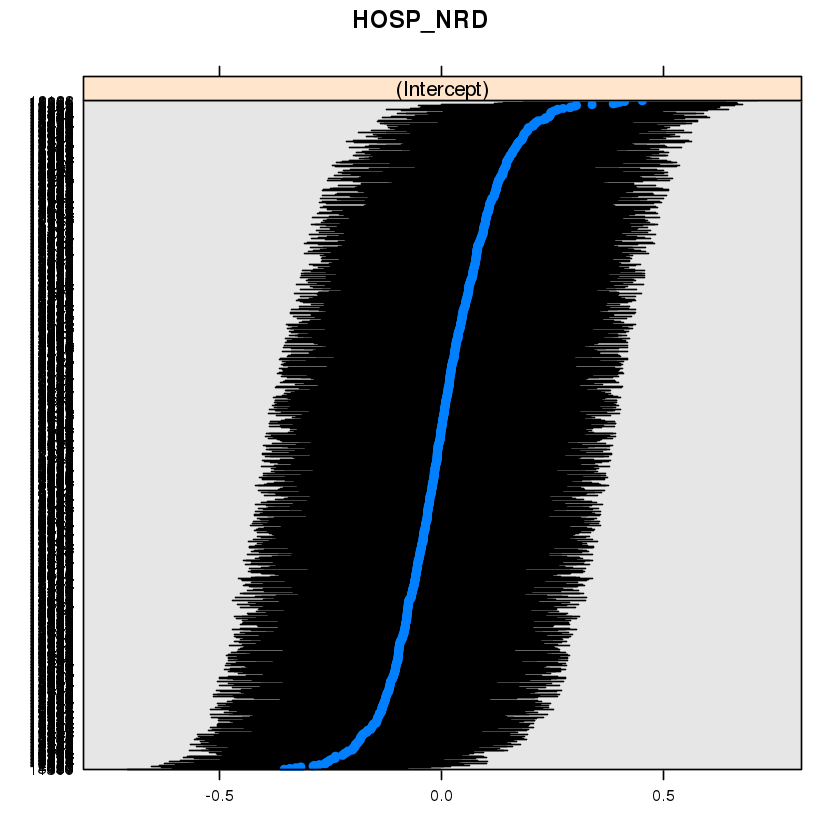

In [36]:
dotplot(rf)

In [23]:
hosp_nrd <- train.df$HOSP_NRD
predicted_score <- predict(result, newdata = train.df, allow.new.levels = TRUE, type = 'response')

train.df$HOSP_NRD <- 0
expected_score <- predict(result, newdata = train.df, allow.new.levels = TRUE, type = 'response')
adjustment <- data.frame('KEY_NRD'=train.df$KEY_NRD, 'HOSP_NRD'=hosp_nrd, 'readm30'=train.df$readm30, 
                         'predicted_score'=predicted_score, 'expected_score'=expected_score)

national_observed <- mean(adjustment$readm30)

adjusted_rate = aggregate(adjustment[c('readm30', 'predicted_score', 'expected_score')], list(adjustment$HOSP_NRD), mean)
colnames(adjusted_rate)[1] = 'HOSP_NRD'
adjusted_rate$Adjusted_ME = (adjusted_rate$predicted_score/adjusted_rate$expected_score)*national_observed

adjusted <- merge(random_effects, adjusted_rate, by = 'HOSP_NRD')

In [24]:
head(adjusted)

HOSP_NRD,random_effects,postVar,readm30,predicted_score,expected_score,Adjusted_ME
11006,-0.01748113,0.03179125,0.11235955,0.11679756,0.1185488,0.1238939
11010,-0.12612735,0.02408871,0.09134615,0.10504723,0.1170669,0.1128402
11011,-0.18351360,0.03644160,0.05714286,0.17561304,0.2024266,0.1090944
11013,0.14546269,0.01970074,0.17030568,0.15595326,0.1388470,0.1412445
11014,-0.06775867,0.01958449,0.10389610,0.10886687,0.1152830,0.1187528
11021,-0.16300451,0.02744480,0.06896552,0.09013251,0.1039424,0.1090441


In [25]:
write.csv(adjusted, paste0(path, 'cohorts30/', cohort, '/inference/adjusted_ME', split_seed, train_idx, '.csv'))

### Resampling

In [7]:
library(dplyr)


Attaching package: ‘dplyr’

The following object is masked from ‘package:GGally’:

    nasa

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [6]:
index.df <- read.csv(file = paste0(path, 'cohorts30/', cohort, '/index_comorb.csv'))
index.df$HOSP_NRD <- as.factor(index.df$HOSP_NRD)
index.df$FEMALE <- as.factor(index.df$FEMALE)
for(c in comorbs){
    index.df[ , c] <- as.factor(index.df[ , c])
}
index.df$readm30 <- as.numeric(index.df$readm30) - 1
age.mean <- mean(index.df$AGE)
age.std <- sd(index.df$AGE)
index.df$AGE <- (index.df$AGE - age.mean)/age.std

In [8]:
testing.df <- index.df[1:30, ]

In [9]:
length(unique(testing.df$HOSP_NRD))

[1] 28

In [14]:
testing.df[ , c('KEY_NRD', 'HOSP_NRD')]

KEY_NRD,HOSP_NRD
10576754,12929
19785198,12175
19212175,12024
21012648,12307
18432816,12245
16083400,12298
19388490,12470
17534155,11824
23046598,12793
13056062,12110


In [10]:
resample <- testing.df %>% group_by(HOSP_NRD) %>% mutate(sample_size=n())

In [15]:
resample

X,AGE,AWEEKEND,DIED,DISCWT,DISPUNIFORM,DMONTH,DQTR,DRG,DRGVER,⋯,CM_PARA,CM_PERIVASC,CM_PSYCH,CM_PULMCIRC,CM_RENLFAIL,CM_TUMOR,CM_ULCER,CM_VALVE,CM_WGHTLOSS,sample_size
0,-0.09223041,0,0,2.046126,6,1,1,249,31,⋯,0,0,0,0,1,0,0,0,0,1
1,0.41348525,0,0,1.435778,1,10,4,280,32,⋯,0,0,0,0,1,0,0,0,0,1
2,-0.67019116,0,0,2.308072,1,11,4,282,32,⋯,0,0,0,0,0,0,0,0,0,1
3,-0.38121078,0,0,5.119861,1,11,4,247,32,⋯,0,0,0,0,0,0,0,0,0,1
4,-0.38121078,0,0,1.910494,6,8,3,264,31,⋯,0,0,0,0,1,0,0,0,1,1
5,-1.24815191,1,0,1.962384,1,3,1,247,31,⋯,0,0,0,0,0,0,0,0,0,1
6,-0.30896569,0,0,1.962384,1,10,4,248,32,⋯,0,0,1,0,0,0,0,0,0,1
7,-0.45345588,1,0,2.004409,1,8,3,233,31,⋯,0,0,0,0,0,0,0,0,0,1
8,-0.23672059,1,0,1.985053,1,6,2,282,31,⋯,0,0,0,0,0,0,0,0,0,1
9,0.84695582,0,0,1.347743,6,1,1,280,31,⋯,0,0,0,0,1,0,0,0,0,1


In [17]:
sample_n(resample, size = resample$sample_size)

ERROR: Error: is_scalar_integerish(x = size) is not TRUE


In [40]:
resample[ ,c('HOSP_NRD', 'KEY_NRD')]

HOSP_NRD,KEY_NRD
11055,23559352
11055,23559352
11055,23559352
11154,17638363
11154,17638363
11154,17638363
11178,11219800
11178,11219800
11178,11219800
11292,15105464


In [35]:
sample_n(resample, size = n())

ERROR: Error: This function should not be called directly


In [34]:
mutate(resample, n_rows=n())[ c('HOSP_NRD', 'n_rows')]

HOSP_NRD,n_rows
12929,1
12175,1
12024,1
12307,1
12245,1
12298,1
12470,1
11824,1
12793,1
12110,1


In [ ]:
resample.df <- index.df %>%
  group_by(HOSP_NRD) %>%
  sample_n()

In [30]:
?sample_frac

In [8]:
result <- glmer(readm30 ~ CM_AIDS + CM_ALCOHOL + CM_ANEMDEF + CM_ARTH + CM_BLDLOSS + CM_CHF + CM_CHRNLUNG + CM_COAG + 
                CM_DEPRESS + CM_DM + CM_DMCX + CM_DRUG + CM_HTN_C + CM_HYPOTHY + CM_LIVER + CM_LYMPH + CM_LYTES + CM_METS + 
                CM_NEURO + CM_OBESE + CM_PARA + CM_PERIVASC + CM_PSYCH + CM_PULMCIRC + CM_RENLFAIL + CM_TUMOR + CM_ULCER + 
                CM_VALVE + CM_WGHTLOSS + AGE + FEMALE + (1|HOSP_NRD), data = index.df, family = binomial, 
                control = glmerControl(optimizer = "nloptwrap", calc.derivs = F), nAGQ=7)

In [9]:
rf <- ranef(result, condVar = TRUE)
postVar = attr(rf$HOSP_NRD, 'postVar')

random_effects = rf$HOSP_NRD
dim(postVar) = dim(postVar)[3]
random_effects$postVar = postVar

In [10]:
write.csv(random_effects, paste0(path, 'cohorts30/ami/RE_resampled0.csv'))